# Utilisation de Pandas pour construire des tables de données.

Ce cahier montre l'utilisation de Numpy et de Pandas pour constuire un tableau de données qui donnera lieu ensuite à un faisceau de courbes, affiché avec MatPlotLib. Ces données sont calculées (il s'agit ici du calcul de l'humidité relative en fonction de la température de bulbe sec et humide). L'avantage du dataframe est sa grande compatibilité avec Excel et de simplifier aussi la mise en forme du graphique.

Les propriétés de l'air humide sont ici calculée grâce à l'extension [CoolProp](http://www.coolprop.org/) qui a un chapitre sur [l'air humide](http://www.coolprop.org/fluid_properties/HumidAir.html).

In [2]:
import pandas as pd
import numpy as np
from CoolProp.HumidAirProp import HAPropsSI

In [3]:
# on est à pression ambiante
p = 101325 # Pa

# Les températures bulbe sec 
T = np.arange(20, 41, 2)
print(T, end=' ')

[20 22 24 26 28 30 32 34 36 38 40] 

In [4]:
def C2K(t):
    '''convert °C to °K'''
    return t + 273.15

def K2C(t):
    '''convert °K to °C'''
    return t - 273.15

In [6]:
# les températures de bulbe humide
Twb = np.arange(16,31, 2)
print(Twb, end=' ')

[16 18 20 22 24 26 28 30] 

In [7]:
# initialisation du tableau des humidités relatives
R = np.zeros((len(T), len(Twb)))
R.shape

(11, 8)

Pour créer une matrice de valeurs, il faut passer par des index.

In [12]:
# initialisation des index pour parcourir T et Twb
T_index = range(len(T))
Twb_index = range(len(Twb))

In [19]:
ebsilon = 0.000000001  # il faut abaisser Twb pour garder un calcul autour de 100% d'humidté

for t, tid in zip(T, T_index):
    for twb, twbid in zip(Twb, Twb_index):
        try:
            R[tid, twbid] = round(100*HAPropsSI('R', 'T', C2K(t), 'P', p, 'Twb', C2K(twb-ebsilon)))
        except:
            R[tid, twbid] = np.nan

# imprimer la matrice en mode texte (sans pandas)
from tabulate import tabulate
print(tabulate(R, showindex=T_labels, headers=Twb_labels, tablefmt='simple'))

        16°C    18°C    20°C    22°C    24°C    26°C    28°C    30°C
----  ------  ------  ------  ------  ------  ------  ------  ------
20°C      67      83     100     nan     nan     nan     nan     nan
22°C      54      68      83     100     nan     nan     nan     nan
24°C      43      56      70      84     100     nan     nan     nan
26°C      35      46      58      71      85     100     nan     nan
28°C      27      37      48      60      72      85     100     nan
30°C      21      30      40      50      61      73      86     100
32°C      16      24      33      42      52      62      74      86
34°C      12      19      27      35      44      53      64      75
36°C       9      15      22      29      37      46      55      65
38°C       6      11      18      24      31      39      47      56
40°C       3       9      14      20      26      33      41      49


In [20]:
# on concertit maintenant la matrice en un dataframe pandas
df = pd.DataFrame(R)
df

,0,1,2,3,4,5,6,7
0,67.0,83.0,100.0,NaN,NaN,NaN,NaN,NaN
1,54.0,68.0,83.0,100.0,NaN,NaN,NaN,NaN
2,43.0,56.0,70.0,84.0,100.0,NaN,NaN,NaN
3,35.0,46.0,58.0,71.0,85.0,100.0,NaN,NaN
4,27.0,37.0,48.0,60.0,72.0,85.0,100.0,NaN
5,21.0,30.0,40.0,50.0,61.0,73.0,86.0,100.0
6,16.0,24.0,33.0,42.0,52.0,62.0,74.0,86.0
7,12.0,19.0,27.0,35.0,44.0,53.0,64.0,75.0
8,9.0,15.0,22.0,29.0,37.0,46.0,55.0,65.0
9,6.0,11.0,18.0,24.0,31.0,39.0,47.0,56.0


Le data frame est crée, mais les colonnes et les lignes sont indexés par des entiers, qui n'ont pas de signification pour nous. Nous allons les remplacer par des étiquettes.

In [28]:
# on prépare les étiquettes
T_labels = [f'{x}°C' for x in T]
print(T_labels)  # pour les lignes
Twb_labels = [f'{x}°C' for x in Twb]
print(Twb_labels)  # pour les colonnes


['20°C', '22°C', '24°C', '26°C', '28°C', '30°C', '32°C', '34°C', '36°C', '38°C', '40°C']
['16°C', '18°C', '20°C', '22°C', '24°C', '26°C', '28°C', '30°C']


Maintenant qu'on a nos listes d'étiquettes de lignes et de colonnes, nous allons les substituer aux index avec le commande [rename](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html).

In [22]:
# changement du nom des colonnes
df1 = df.rename(mapper=lambda x: Twb_labels[x], axis='columns')
df1

,16°C,18°C,20°C,22°C,24°C,26°C,28°C,30°C
0,67.0,83.0,100.0,NaN,NaN,NaN,NaN,NaN
1,54.0,68.0,83.0,100.0,NaN,NaN,NaN,NaN
2,43.0,56.0,70.0,84.0,100.0,NaN,NaN,NaN
3,35.0,46.0,58.0,71.0,85.0,100.0,NaN,NaN
4,27.0,37.0,48.0,60.0,72.0,85.0,100.0,NaN
5,21.0,30.0,40.0,50.0,61.0,73.0,86.0,100.0
6,16.0,24.0,33.0,42.0,52.0,62.0,74.0,86.0
7,12.0,19.0,27.0,35.0,44.0,53.0,64.0,75.0
8,9.0,15.0,22.0,29.0,37.0,46.0,55.0,65.0
9,6.0,11.0,18.0,24.0,31.0,39.0,47.0,56.0


In [23]:
# changement du noms des index de lignes
df = df1.rename(mapper=lambda x: T_labels[x], axis='rows')
df

,16°C,18°C,20°C,22°C,24°C,26°C,28°C,30°C
20°C,67.0,83.0,100.0,NaN,NaN,NaN,NaN,NaN
22°C,54.0,68.0,83.0,100.0,NaN,NaN,NaN,NaN
24°C,43.0,56.0,70.0,84.0,100.0,NaN,NaN,NaN
26°C,35.0,46.0,58.0,71.0,85.0,100.0,NaN,NaN
28°C,27.0,37.0,48.0,60.0,72.0,85.0,100.0,NaN
30°C,21.0,30.0,40.0,50.0,61.0,73.0,86.0,100.0
32°C,16.0,24.0,33.0,42.0,52.0,62.0,74.0,86.0
34°C,12.0,19.0,27.0,35.0,44.0,53.0,64.0,75.0
36°C,9.0,15.0,22.0,29.0,37.0,46.0,55.0,65.0
38°C,6.0,11.0,18.0,24.0,31.0,39.0,47.0,56.0


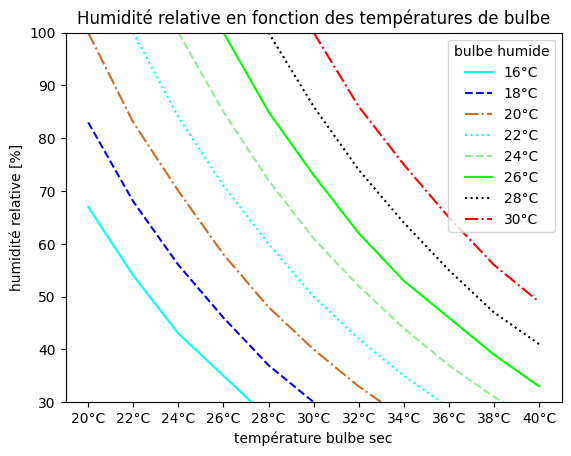

In [48]:
# impression de la matrice comme un faisceau de courbes

import matplotlib.pyplot as plt
from cycler import cycler

# df.plot() # version courte, mais sans enrichissement
fig, ax = plt.subplots()
# on redéfinie les styles des courbes avant de les créer avec plot
ax.set_prop_cycle(color=['aqua', 'blue', 'chocolate', 'cyan', 'lightgreen', 'lime', 'black', 'red'],
                  linestyle=['-', '--', '-.', ':','--','-', ':', '-.' ]) 
ax.plot(df)  # commencer par cela, sinon, données non connues par exemple pour la légende
ax.set_xlabel('température bulbe sec')
ax.set_ylabel('humidité relative [%]')
ax.set_ylim(30, 100)
ax.legend(Twb_labels, title='bulbe humide', loc='upper right')
plt.title('Humidité relative en fonction des températures de bulbe')

plt.show()

In [36]:
# transfer du tableau de données sous Excel
df.to_excel('./img/rh_dry_wet.xlsx')